### 《泰坦尼克号中的机器学习》
#### 工作流程
1. 问题或问题的定义.
2. 获取 training（训练）和 testing（测试）数据.
3. Wrangle（整理）, prepare（准备）, cleanse（清洗）数据
4. Analyze（分析）, identify patterns 以及探索数据.
5. Model（模型）, predict（预测）以及解决问题.
6. Visualize（可视化）, report（报告）和提出解决问题的步骤以及最终解决方案.
7. 提供或提交结果.

#### 工作目标

数据科学解决方案工作流程有以下七个主要的目标.
1. Classifying（分类）. 我们可能想对我们的样本进行分类或加以类别. 我们也可能想要了解不同类别与解决方案目标的含义或相关性.
2. Correlating（相关）. 可以根据训练数据集中的可用特征来处理这个问题. 数据集中的哪些特征对我们的解决方案目标有重大贡献？从统计学上讲, 特征和解决方案的目标中有一个相关？随着特征值的改变, 解决方案的状态也会随之改变, 反之亦然？这可以针对给定数据集中的数字和分类特征进行测试. 我们也可能想要确定以后的目标和工作流程阶段的生存以外的特征之间的相关性. 关联某些特征可能有助于创建, 完善或纠正特征。
3. Converting（转换）. 对于建模阶段, 需要准备数据. 根据模型算法的选择, 可能需要将所有特征转换为数值等价值. 所以例如将文本分类值转换为数字的值.
4. Completing（完整）. 数据准备也可能要求我们估计一个特征中的任何缺失值. 当没有缺失值时，模型算法可能效果最好.
5. Correcting（校正）. 我们还可以分析给定的训练数据集以找出错误或者可能在特征内不准确的值, 并尝试对这些值进行校正或排除包含错误的样本. 一种方法是检测样本或特征中的任何异常值. 如果对分析没有贡献, 或者可能会显着扭曲结果, 我们也可能完全丢弃一个特征.
6. Creating（创建）. 我们可以根据现有特征或一组特征来创建新特征, 以便新特征遵循 correlation（相关）, conversion（转换）, completeness（完整）的目标.
7. Charting（绘图）. 如何根据数据的性质和解决方案的目标来选择正确的可视化图表工具以及绘图.


### 一. 先导入需要用到的工具包

In [1]:
#数据分析和整理
import pandas as pd
import numpy as np 
import random as rnd
#可视化工具
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#机器学习包
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier 

### 二. 获取数据
python中的pandas包帮组我们处理我们的数据集，我们首先将训练和测试数据集收集到Pandas DataFrame中，我们还将这些数据集组合在一起，进行某些操作。

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [train_df,test_df]

### 三. 通过describing（描述）描述进行数据分析

**1. 数据集中哪些特征是可用的？**

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**2.哪些特征是(categorical)分类的，哪些特征是(numerical)数值的？**

In [4]:
#预览数据
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


** 3.哪些特征是混合的数据类型，或者包含错误和Null**

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**4.以及各个特征的数据类型是什么样**

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**5.分析样本中数值特征的分布情况**

这样有利于我们确定，在实际问题领域的训练数据集是如何具有代表性的.

    @总样本是 891 或者在泰坦尼克号（2,224）上实际旅客的 40%.
    @Survived（生存）是一个具有 0 或 1 值的分类特征.
    @大约 38% 样本幸存了下来, 然而实际的幸存率是 32%.
    @大多数旅客 (> 75%) 没有和父母或孩子一起旅行.
    @近 30% 的旅客有兄弟姐妹 和/或 配偶.
    @少数旅客 Fares（票价）差异显著 (<1%), 最高达 $512.
    @很少有年长的旅客 (<1%) 在年龄范围 65-80.

In [7]:
#mean 平均，std 标准差
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**6.分析样本中分类特征的分布情况**

    @Names（名称）特征在数据集中是唯一的 (count=unique=891)
    @Sex（性别）变量有两个可能的值, 男性为 65% (top=male, freq=577/count=891).
    @Cabin（房间号）值在样本中有重复. 或者几个旅客共享一个客舱.
    @Embarked（出发港）有 3 个可能的值. 大多数乘客使用 S 港口(top=S)
    @Ticket（船票号码）特征有很高 (22%) 的重复值 (unique=681).


In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Carbines, Mr. William",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


### 四. 基于数据分析的假设
到目前为止, 基于数据分析, 我们得出以下假设. 在采取适当的行动之前, 我们可能会进一步验证这些假设.

**Correlating（相关）.**
我们想知道每个特征与生存相关的程度. 我们希望在项目早期做到这一点, 并将这些快速相关性与项目后期的模型相关性相匹配.

**Completing（完整）.**
1. 我们可能想要去补全丢失的 Age（年龄）特征，因为它肯定与生存相关.
2. 我们也想要去补全丢失的 Embarked（出发港）特征, 因为它也可能与生存或者其它重要的特征相关联.

**Correcting（校正）.**
1. Ticket（船票号码）特征可能会从我们的分析中删除, 因为它包含了很高的重复比例 (22%), 并且票号和生存之间可能没有关联.
2. Cabin（房间号）特征可能因为高度不完整而丢失, 或者在 训练和测试数据集中都包含许多 null 值.
3. PassengerId（旅客ID）可能会从训练数据集中删除, 因为它对生存来说没有贡献.
4. Name（名称）特征是比较不规范的, 可能不直接影响生产, 所以也许会删除.

**Creating（创建）.**
1. 我们可能希望创建一个名为 Family 的基于 Parch 和 SibSp 的新特征，以获取船上家庭成员的总数.
2. 我们可能想要设计 Name 功能以将 Title 抽取为新特征.
3. 我们可能要为 Age（年龄）段创建新的特征. 这将一个连续的数字特征转变为一个顺序的分类特征.
4. 如果它有助于我们的分析, 我们也可能想要创建 Fare（票价）范围的特征。

**Classifying（分类）.**
根据前面提到的问题描述, 我们也可以增加我们的假设.
1. Women (Sex=female) 更有可能幸存下来.
2. Children (Age<?) 更有可能幸存下来.
3. 上层阶级的旅客 (Pclass=1) 更有可能幸存下来.

### 五. 通过旋转特征进行分析
为了确认我们的一些观察和假设, 我们可以快速分析我们的特征之间的相互关系. 我们只能在这个阶段为没有任何空值的特征做到这一点. 对于 Sex（性别），顺序的（Pclass）或离散的（SibSp，Parch）类型的特征, 这也是有意义的.

    @Pclass 我们观察到 Pclass = 1 和 Survived（分类＃3）之间的显着相关性（> 0.5）. 我们决定在我们的模型中包含这个特征.
    @Sex 在 Sex=female（性别=女性）的问题定义中确认了74％（分类＃1）的幸存率非常高的观察意见.
    @SibSp and Parch 这些特征对于某些值具有零相关性. 从这些单独的特征（创建＃1）派生一个特征或一组特征可能是最好的

In [9]:
#Pclass 我们观察到 Pclass = 1 和 Survived（分类＃3）之间的显着相关性（> 0.5）. 我们决定在我们的模型中包含这个特征.
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=True)

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [11]:
#Sex 在 Sex=female（性别=女性）的问题定义中确认了74％（分类＃1）的幸存率非常高的观察意见.
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
#SibSp and Parch 这些特征对于某些值具有零相关性. 从这些单独的特征（创建＃1）派生一个特征或一组特征可能是最好的
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 六. 通过可视化数据进行分析
现在我们可以继续使用可视化分析数据来确认我们的一些假设。

**1.关联数值的特征**

让我们从理解数值的特征和解决方案目标（生存）之间的相关性开始.
柱状图可用于分析连续的数字变量，如 Age（年龄），其中条带或范围将有助于识别有用的模式. 直方图可以使用自动定义的 bins 或等分范围的 bins 来说明样本的分布. 这有助于我们回答有关特定频段的问题（婴儿有更好的幸存率吗？）

请注意，直方图可视化中的 x 轴表示样本或旅客的数量.

**Observations（观察）**

    @婴儿（4 岁以下）存活率高.
    @最老的乘客（年龄= 80）幸存下来.
    @大量的 15-25 岁的孩子没有幸.
    @大多数乘客在 15-35 年龄范围内.

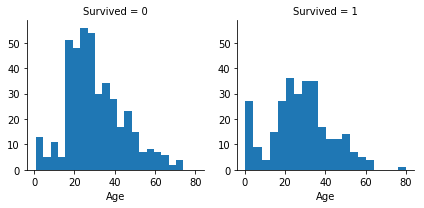

In [14]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

**Decisions（决策）.**
这个简单的分析证实了我们的假设, 作为后续工作流程阶段的决策.

    @在我们的模型训练中, 我们应该考虑年龄（我们假设分类＃2）.
    @完成空值的年龄功能（完成＃1）.
    @我们应该 band（组合）年龄组（创建＃3).

**2.关联数字和顺序的特征** 

我们可以结合多个特征使用一个图来确定其相关性. 这可以通过具有数字值的数字和分类特征来完成。

**Observations（观察）**
   
    @Pclass=3 拥有最多的乘客，但大多数没有生存. 确认我们的分类假设 ＃2.
    @Pclass=2 和 Pclass = 3 的婴儿乘客大多存活. 进一步限定了我们的分类假设 ＃2.
    @Pclass=1 的大多数乘客幸存下来。 确认我们的分类假设 ＃3。
    @Pclass 在乘客的年龄分布方面有所不同.


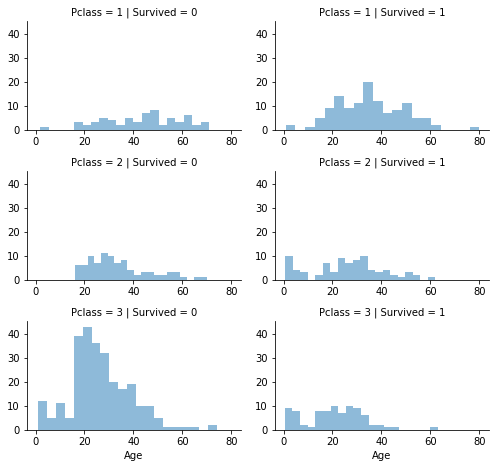

In [15]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
# grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

**Decisions（决策）**   
    
    @考虑Pclass用于模型训练

**3.关联分类特征**  

现在我们可以将分类特征与我们的解决方案目标关联起来。



**Observations（观察）**

    @Female（女性）旅客的幸存率比 male（男性）好得多. 确认分类（＃1）。
    @Embarked= C 的例外, 其中男性的成活率较高. 这可能是 Pclass 和 Embarked 之间的相关性。反过来Pclass 和 Survived，不一定是Embarked和Survived之间的相关性。
    @与 C 和 Q 港口的 Pclass = 2 相比, Pclass = 3 时男性的生存率更高. 完成（＃2）。
    @出发港口的 Pclass=3 和男性乘客的生存率不同. 相关（＃1）。

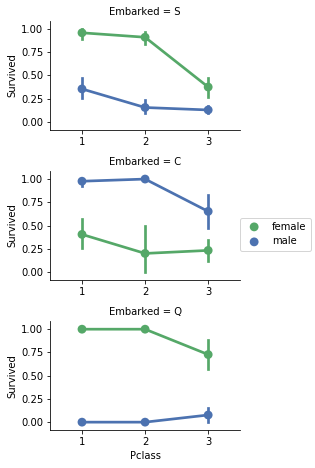

In [16]:
grid = sns.FacetGrid(train_df,row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

**Decisions（决策）**

    @增加 Sex 特征以用于模型训练.
    @补全丢失值并添加 Embarked 特征以用于模型训练.

**4.关联分类和数值的特征**

我们也可能想要关联分类特征（非数值的）和数值的特征. 我们可以考虑将 Embarked（类别非数字）, Sex（类别非数字）, Fare（数字连续）与生存（分类数字）相关联.

**Observations(观察)**

    @更高的票价付费旅客有更好的生存. 证实我们对创造（＃4）票价范围的假设.
    @搭乘港口与生存率相关. 确认关联（＃1）和完成（＃2）.


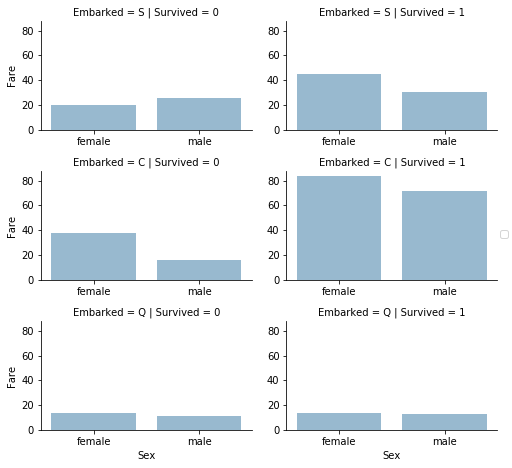

In [17]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

**Decisions（决策）**

    @考虑关联Fare(票价)特征

### 七. 整理数据

我们收集了关于我们的数据集和解决方案要求的一些假设和决策. 到目前为止, 我们没有必要改变一个单个的特征或值来达到目标. 让我们现在执行我们的决定和假设来 correcting(校正), creating（创建）和 completing（完整）目标.

**1. 通过删除特征进行校正**

这是一个很好的开始执行目标. 通过丢弃特征, 我们正在处理更少的数据点. 加快我们的 notebook, 并简化分析.

根据我们的假设和决策, 我们要放弃 Cabin（房间号）（更正＃2）和 Ticket（票号）（更正＃1）的特征.

请注意, 如果适用, 我们将对训练和测试数据集进行操作, 以保持一致.


In [18]:
print("Before", train_df.shape,test_df.shape, combine[0].shape, combine[1].shape)
#删除掉'Ticket','Cabin'所在的列
train_df = train_df.drop(['Ticket','Cabin'],axis=1)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)
combine = [train_df,test_df]
print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


**2.从现有的提取创建新的特征**

我们想要分析一下，Name特征是否可以被设计来提取titles和测试titles与生存之间的相关性，然后再删除Name和PassengerId特性。

在下面的代码中, 我们使用正则表达式提取 Title 特征. 正则表达式(\w+\.)匹配 Name 特征中以点号字符结尾的第一个单词。
expand = False 标志返回一个 DataFrame.


**Observations(观察)**

当我们绘制出 Title, Age 和 Survived 的图时, 我们可以发现：

    @大多数title年龄组准确。 例如：Master title的Age平均为5岁。？
    @title中的生存年龄段略有不同。
    @某些 Title 大多存活(Mme, Lady, Sir)或某些title没有存活(Don, Rev, Jonkheer)

In [19]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    
#pd.crosstab(train_df['Title'], train_df['Sex'])
# pd.crosstab(train_df['Title'],train_df['Survived'])
train_df[['Title','Age']].groupby(['Title'],as_index=False).mean()
# pd.crosstab(train_df['Title'],train_df['Age'])

,Title,Age
0,Capt,70.000000
1,Col,58.000000
2,Countess,33.000000
3,Don,40.000000
4,Dr,42.000000
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,4.574167
9,Miss,21.773973


我们可以用一个更常见的名称来替换很多title，或者将它们归类为Rare(稀有)。

In [20]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


我们可以将 titles转换为顺序的：

In [21]:
title_mapping = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    #填充缺失值
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


现在我们可以放心地从训练和测试数据集中删除 Name 特征. 我们也不需要训练数据集中的 PassengerId 特征.

In [22]:
train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(['Name'],axis=1)
combine=[train_df,test_df]
train_df.shape,test_df.shape

((891, 9), (418, 9))

**转换分类的特征**

现在我们可以将包含字符串的特征转换为数字值. 这是大多数模型算法所要求的. 这样做也将帮助我们实现特征完成目标. 让我们开始将 Sex（性别）特征转换为名为 Gender（性别）的新特征, 其中 female=1, male=0.

In [23]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


**完整化数值连续特征**

现在我们应该开始估计和完成缺少或空值的特征. 我们将首先为 Age（年龄）特征执行此操作.

我们可以考虑三种方法来完整化一个数值连续的特征.
    
    1.简单的方法是在平均值和 标准偏差 之间生成随机数.
    2.更准确地猜测缺失值的方法是使用其他相关特征. 在我们的例子中, 我们注意到 Age（年龄）, Sex（性别）和 Pclass 之间的相关性. 猜测年龄值使用 中位数 Age 中的各种 Pclass 和 Gender 特征组合的值. 因此, Pclass=1 和 Gender=0，Pclass=1 和 Gender=1 的年龄中位数等等...
    3.结合方法 1 和 2. 因此. 不要根据中位数来猜测年龄值, 而应根据 Pclass 和 Sex 组合, 使用平均数和标准差之间的随机数.
    
方法 1 和 3 将在我们的模型中引入随机噪声. 多次执行的结果可能会有所不同. 我们更喜欢方法 2.

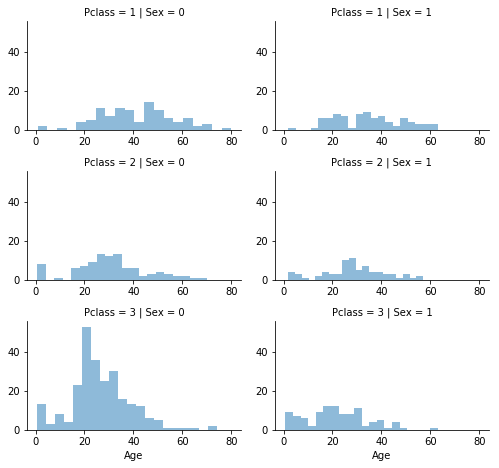

In [24]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

让我们开始准备一个空数组, 以包含基于 Pclass x Gender 组合以猜测 Age 值.

In [25]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

现在我们迭代 Sex（0 或 1）和 Pclass（1, 2, 3）来计算 6 个组合的 Age 的猜测值.

In [26]:
"""
dataset['Sex']==0 返回是一个boolean数组 True代表了这满足dataset['Sex']==0，False则不满足
"""
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            #这里获得的是年龄的数组
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            #取年龄中间值
            age_guess = guess_df.median()
            #将得到的年龄转换为最接近.5的年龄
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    for i in range(0, 2):
        for j in range(0, 3):
            #对年龄为空的值进行替换。
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


让我们创建年龄段并确定与 Survived 的相关性.

In [27]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


让我们使用年龄段的顺序值来替换 Aage.

In [28]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


**我们删除AgeBand特征**

In [29]:
train_df=train_df.drop(['AgeBand'],axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


**结合现有特征创建新特征**

我们可以用Parch和SibSp结合创建一个新的特征FamilySize,这样我们就能够从我们的数据集中删除Parch和SibSp.

In [30]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


我们可以创建另一个名为 IsAlone 特征.

In [31]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


现在我们放弃Parch,SliSp和FamiySize特征，转而使用isAlone特征

In [32]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


我们还可以创建一个结合 Pclass 和 Age 的人造特征.

In [33]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


**完整化分类特征**

Embarked（出发港）特征有 S, Q, C 三个基于出发港口的值. 我们的训练集有两个丢失值. 我们简单的使用最常发生的情况来填充它.

In [34]:
#去掉空值，返回出现最多的值
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


**转换分类特征为数值**

我们现在可以通过创建一个新的数字特征来转换Embarked特征.

In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


**快速完整化并转换数值的特征**

现在，我们可以在测试数据集使用模式下为单个缺失值完整化票价特征, 以获取此特征最常出现的值. 我们用一行代码来完成.
请注意, 我们并没有创建中间用的新特征, 也没有对相关性进行任何进一步的分析以猜测丢失的特征, 因为我们只替换单个值. 完成目标达到了模型算法对非空值操作的期望要求.
我们可能还想把票价四舍五入到小数点后两位, 因为它代表货币.

In [37]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


我们创建FareBand特征

In [38]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


将Fare特征转换为基于FareBand的顺序值

In [39]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


并且测试数据集也一样

In [42]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


### 模型，预测和解决方案

现在我们准备训练模型并通过训练得到的模型预测结果。有60多种用于预测的模型可供选择。我们必须了解问题的类型和解决方案的要求，将模型数量缩小到少数几个。我们的问题是分类和回归问题，因为需要确定输出（生存与否）与其他变量或特征（性别，年龄，港口...）之间的关系。此外，我们的问题应该属于监督学习，因为我们用已知类别的数据集来训练我们的模型。有了监督学习、分类和回归这两个标准，我们可以将模型选择的范围缩小到几个。这些包括：
    
    Logistic回归
    KNN或K—近邻
    支持向量机
    朴素贝叶斯分类器
    决策树
    随机森林
    感知器
    人工神经网络
    相关向量机

In [43]:
X_train = train_df.drop('Survived',axis=1)
Y_train = train_df['Survived']
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic回归形式简单，易于建模，适合用于早期的工作流程。Logistics回归使用线性回归模型的预测结果去逼近真实标记的对数几率，形式为参数化的Logistics分布。

注意模型产生的“置信度评分”是基于训练集的。

In [48]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_red = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train)*100,2)
acc_log

80.359999999999999

我们可以使用Logistic回归来验证我们之前对特征的创建所做的假设。这可以通过计算决策函数中的特征的系数来完成。

**系数为正说明该特征增加了结果的对数几率（因而增加了概率），系数为负说明该特征降低了结果的对数几率（从而降低了概率）**

    @Sex特征有最高的正系数，意味着当Sex从男（0）变成女（1）时，Survived = 1的概率增加最多。
    @相反地，随着Pclass特征的增加，Survived = 1的概率减少的最多。
    @Age * Class是一个很好的人造特征，因为它与Survived具有次高的负相关性。
    @Title特征有第二高的正相关系数。

In [60]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287164
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311199
0,Pclass,-0.749006


接下来，我们使用支持向量机（SVM）模型。支持向量机是一个监督学习模型，它使用相关学习算法来分析数据，可以用于分类和回归问题。在二元分类的情况下，SVM算法建立一个模型，去找两类训练样本“正中间”的划分超平面，因为该划分超平面对训练样本局部扰动的“容忍性”最好。

注意SVM模型生成的“置信度评分”高于Logistics回归模型。


In [65]:
#Support Vector Machines 

svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
acc_svc

83.840000000000003

在模式识别中，k-近邻算法（简称k-NN）是一种用于分类和回归的无参数方法。测试样本找出训练集中与其最靠近的k个训练样本，选择这k个样本中出现最多的类别标记作为预测结果（k是一个正整数，通常很小）。如果k = 1，则该对象的类别和最近邻样本的类别一致。


In [77]:
#KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train)*100,2)
acc_knn

84.739999999999995

在机器学习中，朴素贝叶斯分类器是一个基于所有特征互相独立的贝叶斯理论的简单概率分类器。
朴素贝叶斯分类器具有高度可扩展性，在学习过程中需要大量的线性特征作为参数。

该模型生成的“置信度评分”是目前模型中最低的。

In [82]:
#Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,Y_train)*100,2)
acc_gaussian

72.280000000000001

感知器是用于二元分类器的监督学习的算法（可以决定包含一个向量的输入是否属于某个类别）。
它是一种线性分类器，即一种分类算法，通过一个线性预测函数将一组权重与特征向量组合来进行预测。
该算法允许在线学习，因为它在一次迭代中只处理一个训练集中的元素。

In [83]:
#Perceptron

perceptron = Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train,Y_train)*100,2)
acc_perceptron

C:\Users\v_wangdehong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.0

In [84]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.010000000000005

In [109]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

C:\Users\v_wangdehong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.340000000000003

该模型使用决策树作为预测模型，将特征（树的分支）映射到决策结果（树的叶结点）。目标变量是有限的一组值的树称为分类树; 在这些树结构中，叶结点对应于决策结果，其他每个结点对应于一个属性测试，每个结点包含的样本集合根据属性测试的结果被划分到子结点中。目标变量可以取连续值（通常是实数）的决策树称为回归树。

**该模型的“置信度评分”是目前模型中最高的。**

In [189]:
#Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train,Y_train)*100,2)
acc_decision_tree

86.760000000000005

随机森林是最流行的模型之一。随机森林或随机决策树森林是一种用于分类，回归或其他任务的集成学习模型，它通过在训练时构造大量的决策树（n_estimators = 100），再使用某种策略将这些“个体学习器”结合起来。

该模型的“置信度评分”是目前模型中最高的。我们决定使用这个模型的输出（Y_pred）来作为竞赛结果。

In [213]:
#Random Forest

random_forest = RandomForestClassifier()
random_forest.fit(X_train,Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)
acc_random_forest

86.760000000000005

### 模型评估

现在, 我们可以对所有模型进行评估, 为我们的问题选择最好的模型。 虽然决策树和随机森林评分相同, 但我们选择使用随机森林，因为随机森林会校正决策树“过拟合”的缺点。

In [215]:
models = pd.DataFrame({'Model':['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],'Score':[acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
7,Linear SVC,79.01
6,Stochastic Gradient Decent,78.34
5,Perceptron,78.00
4,Naive Bayes,72.28


In [216]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
#最后生成提交文件
submission.to_csv('data/submission.csv', index=False)

我们提交给竞赛网站 Kaggle 的比赛结果在 6,082 个参赛作品中获得 3883 名. 当竞赛正在进行时，这个结果是具有指导意义的. 这个结果只占提交数据集的一部分. 对我们的第一次尝试是不错的. 欢迎任何提高我们的分数的建议.